# **Assignment 2: Content Analysis and Regression**

For this assignment, you need to test a hypothesis using multiple linear regression. Before doing that, you also need to use computational content analysis and NLP techniques to create new variables that you will use as a predictor in the regression model.

##**Research Background**##

According to Chatman (1980), characters are constructs within abstracted narratives, described through networks of personality traits (e.g., Sarrasine is feminine, Othello is jealous, Roland Deschain is brave). Docherty characterizes the process of depicting and interpreting characters in literature as 'characterization' (cited by Bennett and Royle, 2017). Reaske (1996) identifies several devices of characterization, including character appearance, asides and soliloquies, dialogue, hidden narration, language, and actions performed. Characterization is crucial in narrative because it allows readers to relate to characters and feel emotionally engaged in the story (Cohen, 2001). providing information on personalities and behaviors for gender representation analysis in fiction.

For this assignment, you'll work with a corpus of the genre Real Person Fiction (RPF), where characters are characterized by blending real-life traits with fans' interpretations and reimagination, reflecting societal and cultural trends.

On the online fanfiction platform AO3, fanfictions about the Korean boy band BTS represent the largest fandom, surpassing even the Marvel Universe and Harry Potter franchises. Research into the global popularity of the Korean Wave (*Hallyu*) has highlighted the concept of "manufactured versatile masculinity" exhibited by male K-pop idols, a blend of softer, more effeminate appearances or behaviors with traditional forms of hegemonic masculinity, described by scholars such as Jung (2011), Kuo et al. (2020), Kwon (2019), and Oh (2015). Oh (2015) terms this "liminal masculinity," with androgynous K-pop male idols crossing gender lines.

**Aim:**

This assignment aims to analyze the impact of soft masculinity on K-pop fanfiction's success using a corpus of 100 BTS fanfictions.

**Data:**

We will utilize a dataset from the GOLEM project, comprising 100 BTS-related fanfictions, including story ID, publication year, word count, kudos, comments, and story content in English (1,000 to 1,200 words).

**Methods:**
- operationalize the concept of 'soft masculinity' to make it measurable
- use regression analysis to test a hypothesis

In [1]:
# Load and check the dataset
import pandas as pd

df = pd.read_csv('D:\BTS_short_100.csv', encoding="UTF-8")
df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
2,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
4,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...


Have you noticed something odd in the first five lines of this dataset?

There are some duplicates.

So first we need to do some data cleaning, checking how many rows are duplicated and deleting the duplicates.


In [2]:
# Get the number of unique rows
unique_story_ids = df['story_id'].nunique()

# Print the result
print(f"The number of unique 'story_id' values is: {unique_story_ids}")

The number of unique 'story_id' values is: 90


In [3]:
# Remove duplicate rows
df = df.drop_duplicates()

df.head()

,story_id,published_year,words,kudos,comments,story_content
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,..."


In [4]:
# Let's check how many rows there are now
df.shape[0]

90

##**Research Design**##
The steps of this research involve formulating a hypothesis, selecting `kudos` as a proxy for the success of a story -- the dependent variable (Y) -- and calculating a masculinity score to be used as the independent variable (x1). We will also use additional variables that are also likely to have an effect on the success of a story: `publication_year` (x2) - because AO3 user base has grown in time and more recent stories are more likely to receive more kudos simply becasue there are more readers on the platform - and lexical richness (x3) - because it's plausible that a story with a richer vocabulary also has a better style and, therefore, it's liked more by readers.

Note that we don't have variables for `masculinity_score` and `lexical_richness` yet, so we need to calculate them from the text of the stories.

The hypothesis states:

H1: Low levels of masculinity in male characters positively affects fanfiction success when controlling for publication year and lexical richness.

**H0: What is the null hypothesis?**

**H0 (answer in words):** There is no significant relationship between the masculinity level of male characters and the success of fanfiction stories, 
when controlling for publication year and lexical richness.


##**Compute Masculinity Score**##

To calculate a sterotypical masculinity score, we can refer to older theories of perceived gender identity that probably define gender roles in a stereotypical way. an example of this is the Bem Sex-Role Inventory (BSRI) by Dr. Sandra Lipzits Bem (1974), which classifies personality traits into masculine, feminine, and androgynous.

Bem divides personal traits into 60 traits: 20 masculine traits, 20 feminine traits and 20 neutral traits (see figure below).


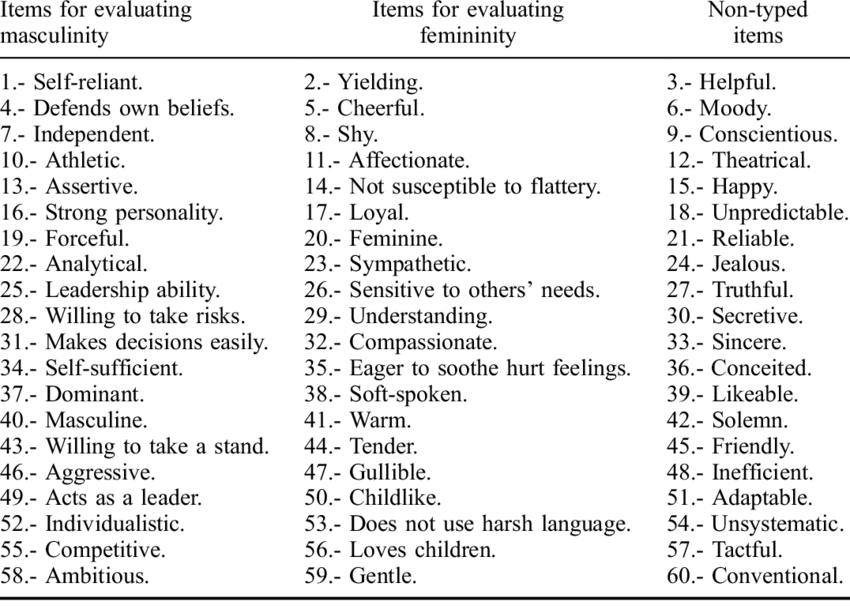

The above list shows that, despite recent discussions about masculinity, femininity, and gender roles have become more diversified, traditional definitions such as those provided by the Bem Sex-Role Inventory (BSRI) can be useful to detect gender stereotypes. Within the definitions of masculinity and femininity outlined by the BSRI, we observe a clear power imbalance: masculinity is associated with dominance (e.g., assertive, strong personality, forceful, leadership ability, dominant, aggressive, ambitious), while femininity leans towards submissiveness (e.g., yielding, understanding, tender). Therefore, we can consider employing the power-agent frames designed by Sap et al. to compute a power score for the male characters in the fanfiction stories. Lower masculinity scores can be plausibly associated with a representation of 'soft masculinity' in relation to a character.

###**Riveter**###

In the W5 lab, we have already gained preliminary experience with the Riveter pipeline.

In this section, we will use utilize the Riveter pipeline with Sap's power-agent frames to calculate the `masculinity_score` for identifiable agents in the text. Since we are interested only in the masculinity of male characters, we will use regular expressions to identify male pronouns (he, him, himself) and calculate their corresponding `masculinity_score`. This score will be added to the df as a new column.


In [8]:
# Set up everything you need to use Riveter, following the notebook we used in W5 lab
# No need to put the code here, as long as it's working
# We assume that you have installed all the required packages, either locally or on Colab

Now we have prepared all the dependencies needed.

The following step was added because the riveter path is different from my jupyter original path. And when I put the notebook into the Riveter folder, it still couldn't work.

In [5]:
%cd C:\Users\cathy/riveter-nlp/riveter 

C:\Users\cathy\riveter-nlp\riveter


In [6]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter # if the notebook is not in the /riveter folder, this will throw an error

import seaborn as sns
import matplotlib.pyplot as plt

**Prepare the corpus**:

First, we can try to initialize two lists to store `story_content` and `story_id`, but this will casue the problem below:

`Token indices sequence length is longer than the specified maximum sequence length for this model (574 > 512).`

This is a limit of the language model (BERT) used by Riveter. We need to split the file into smaller chunks in order for it to be processed correctly. The example in the original Riveter notebook where they load *Pride and Prejudice* shows how we can do this. The code is also provided here below.




In [7]:
def split_text_into_segments(text, max_length=512):
    """
    Segment the text so that each segment contains a maximum of max length tokens.
    """
    segments = []
    current_segment = []
    for word in text.split():
        if len(current_segment) + len(word.split()) <= max_length:
            current_segment.append(word)
        else:
            segments.append(' '.join(current_segment))
            current_segment = [word]
    if current_segment:
        segments.append(' '.join(current_segment))
    return segments

Let's first initialize Riveter with the lexicon that we are going to use:

In [8]:
# Q0 (code): Load lexicon 'power' and create an empty dictionary called 'scores_dict'
riveter = Riveter()
riveter.load_sap_lexicon('power')
scores_dict = {}

Now we can apply the splitting function we defined above and then use Riveter on our corpus. To do this, we need to create a loop that iterates through all the rows in the dataframe and compute scores for each story.

**Q1. Train Riveter to assign scores to text based on male pronouns**

In [9]:
from tqdm import tqdm # used to display a progress bar when executing code

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing stories"):
    story_id = row['story_id']
    story_content = row['story_content']

    # apply the splitting function:
    segments = split_text_into_segments(story_content)
    text_ids = [f"{story_id}_{i}" for i in range(len(segments))]

    # Q1 (code): train riveter specifying 'persona_patterns_dict= ' to assign scores only based on male pronouns
    # write code below:
    riveter.train(segments,
             text_ids,
             num_bootstraps=20,
             persona_patterns_dict={'masculine': r'^he$|^him$|^himself$'})

    # store the computed scores in a dictionary
    persona_score_dict = riveter.get_score_totals()
    masculine_score = persona_score_dict.get('masculine', 0)

    # get a feedback about the computed scores while the code is running
    print(f"Story ID: {story_id}, Masculine Power Score: {masculine_score}")

    # store the score of each story in the same dictionary so that we can then add it to the dataframe
    scores_dict[story_id] = masculine_score

# add the dictionary of scores to the dataframe
df['masculine_power_score'] = df['story_id'].map(scores_dict)

Processing stories:   1%|▋                                                              | 1/90 [00:21<31:55, 21.52s/it]

2024-03-15 05:14:27 Complete!
Story ID: 4706144, Masculine Power Score: 0.082900222382981



Processing stories:   2%|█▍                                                             | 2/90 [00:41<30:07, 20.54s/it]

2024-03-15 05:14:47 Complete!
Story ID: 4752980, Masculine Power Score: 0.29617459821991343



Processing stories:   3%|██                                                             | 3/90 [00:59<28:10, 19.43s/it]

2024-03-15 05:15:05 Complete!
Story ID: 4621698, Masculine Power Score: 0.6260317460317462



Processing stories:   4%|██▊                                                            | 4/90 [01:19<28:12, 19.69s/it]

2024-03-15 05:15:25 Complete!
Story ID: 3651108, Masculine Power Score: 0.13646927081869537



Processing stories:   6%|███▌                                                           | 5/90 [01:40<28:44, 20.29s/it]

2024-03-15 05:15:46 Complete!
Story ID: 5282729, Masculine Power Score: 0.21753418803418803



Processing stories:   7%|████▏                                                          | 6/90 [02:01<28:37, 20.45s/it]

2024-03-15 05:16:07 Complete!
Story ID: 5533886, Masculine Power Score: 0.0005919312169312164



Processing stories:   8%|████▉                                                          | 7/90 [02:22<28:34, 20.66s/it]

2024-03-15 05:16:28 Complete!
Story ID: 4547622, Masculine Power Score: 0.08224557495747828



Processing stories:   9%|█████▌                                                         | 8/90 [02:41<27:16, 19.96s/it]

2024-03-15 05:16:47 Complete!
Story ID: 16177508, Masculine Power Score: 0.14895136920409338



Processing stories:  10%|██████▎                                                        | 9/90 [03:01<27:05, 20.07s/it]

2024-03-15 05:17:07 Complete!
Story ID: 15745185, Masculine Power Score: -0.1371207911476992



 33%|████████████████████████████                                                        | 1/3 [00:09<00:19,  9.81s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (575 > 512). Running this sequence through the model will result in indexing errors

Processing stories:  11%|██████▉                                                       | 10/90 [03:21<26:48, 20.11s/it]

2024-03-15 05:17:27 Complete!
Story ID: 15654528, Masculine Power Score: 0.22981468529204144



Processing stories:  12%|███████▌                                                      | 11/90 [03:41<26:22, 20.03s/it]

2024-03-15 05:17:47 Complete!
Story ID: 7448155, Masculine Power Score: 0.31050589053826805



Processing stories:  13%|████████▎                                                     | 12/90 [04:03<26:37, 20.48s/it]

2024-03-15 05:18:08 Complete!
Story ID: 4983847, Masculine Power Score: 0.08958420353002429



Processing stories:  14%|████████▉                                                     | 13/90 [04:25<27:00, 21.04s/it]

2024-03-15 05:18:31 Complete!
Story ID: 3313118, Masculine Power Score: -0.174728731413514



Processing stories:  16%|█████████▋                                                    | 14/90 [04:47<26:54, 21.25s/it]

2024-03-15 05:18:53 Complete!
Story ID: 3290390, Masculine Power Score: -0.10900876782791673



Processing stories:  17%|██████████▎                                                   | 15/90 [05:10<27:31, 22.02s/it]

2024-03-15 05:19:16 Complete!
Story ID: 36435301, Masculine Power Score: 0.027940288892301275



Processing stories:  18%|███████████                                                   | 16/90 [05:31<26:40, 21.62s/it]

2024-03-15 05:19:37 Complete!
Story ID: 36575491, Masculine Power Score: 0.2583378140811105



Processing stories:  19%|███████████▋                                                  | 17/90 [05:52<26:09, 21.50s/it]

2024-03-15 05:19:58 Complete!
Story ID: 35225224, Masculine Power Score: 0.23996054135520248



Processing stories:  20%|████████████▍                                                 | 18/90 [06:15<26:06, 21.76s/it]

2024-03-15 05:20:21 Complete!
Story ID: 4594527, Masculine Power Score: 0.1886965811965812



Processing stories:  21%|█████████████                                                 | 19/90 [06:35<25:21, 21.43s/it]

2024-03-15 05:20:41 Complete!
Story ID: 5485625, Masculine Power Score: 0.1055413551965276



Processing stories:  22%|█████████████▊                                                | 20/90 [06:55<24:12, 20.75s/it]

2024-03-15 05:21:00 Complete!
Story ID: 36408319, Masculine Power Score: 0.10844641014300457



Processing stories:  23%|██████████████▍                                               | 21/90 [07:17<24:25, 21.24s/it]

2024-03-15 05:21:23 Complete!
Story ID: 35762659, Masculine Power Score: 0.21937125267103713



Processing stories:  24%|███████████████▏                                              | 22/90 [07:38<24:00, 21.19s/it]

2024-03-15 05:21:44 Complete!
Story ID: 35603194, Masculine Power Score: 0.36580051661721347



Processing stories:  26%|███████████████▊                                              | 23/90 [07:59<23:31, 21.07s/it]

2024-03-15 05:22:05 Complete!
Story ID: 35344306, Masculine Power Score: 0.13416939645047105



Processing stories:  27%|████████████████▌                                             | 24/90 [08:17<22:13, 20.20s/it]

2024-03-15 05:22:23 Complete!
Story ID: 36695155, Masculine Power Score: 0.05333333333333333



Processing stories:  28%|█████████████████▏                                            | 25/90 [08:38<22:08, 20.44s/it]

2024-03-15 05:22:44 Complete!
Story ID: 36064474, Masculine Power Score: 0.12081786503865



Processing stories:  29%|█████████████████▉                                            | 26/90 [08:59<21:54, 20.54s/it]

2024-03-15 05:23:05 Complete!
Story ID: 36024820, Masculine Power Score: 0.15907222404732163



Processing stories:  30%|██████████████████▌                                           | 27/90 [09:22<22:31, 21.45s/it]

2024-03-15 05:23:28 Complete!
Story ID: 35182330, Masculine Power Score: 0.08732914170675059



Processing stories:  31%|███████████████████▎                                          | 28/90 [09:44<22:22, 21.65s/it]

2024-03-15 05:23:50 Complete!
Story ID: 36567496, Masculine Power Score: 0.20524770976131573



Processing stories:  32%|███████████████████▉                                          | 29/90 [10:06<21:54, 21.55s/it]

2024-03-15 05:24:12 Complete!
Story ID: 35560330, Masculine Power Score: 0.1376510388190268



Processing stories:  33%|████████████████████▋                                         | 30/90 [10:29<21:57, 21.95s/it]

2024-03-15 05:24:35 Complete!
Story ID: 35877496, Masculine Power Score: 0.1320033242888194



Processing stories:  34%|█████████████████████▎                                        | 31/90 [10:49<21:14, 21.60s/it]

2024-03-15 05:24:55 Complete!
Story ID: 35957410, Masculine Power Score: 0.29021621201335146



Processing stories:  36%|██████████████████████                                        | 32/90 [11:10<20:29, 21.20s/it]

2024-03-15 05:25:16 Complete!
Story ID: 30947654, Masculine Power Score: 0.016165348716619135



Processing stories:  37%|██████████████████████▋                                       | 33/90 [11:30<19:59, 21.04s/it]

2024-03-15 05:25:36 Complete!
Story ID: 36332707, Masculine Power Score: -0.11256600734126099



Processing stories:  38%|███████████████████████▍                                      | 34/90 [11:53<20:03, 21.49s/it]

2024-03-15 05:25:59 Complete!
Story ID: 35967940, Masculine Power Score: 0.17566503674625006



Processing stories:  39%|████████████████████████                                      | 35/90 [12:15<19:45, 21.55s/it]

2024-03-15 05:26:20 Complete!
Story ID: 35001073, Masculine Power Score: 0.1171953046953047



Processing stories:  40%|████████████████████████▊                                     | 36/90 [12:37<19:37, 21.81s/it]

2024-03-15 05:26:43 Complete!
Story ID: 35138911, Masculine Power Score: 0.14039484775281005



Processing stories:  41%|█████████████████████████▍                                    | 37/90 [12:56<18:28, 20.91s/it]

2024-03-15 05:27:02 Complete!
Story ID: 35280397, Masculine Power Score: 0.3102980462519936



Processing stories:  42%|██████████████████████████▏                                   | 38/90 [13:18<18:34, 21.43s/it]

2024-03-15 05:27:24 Complete!
Story ID: 36049939, Masculine Power Score: 0.2708747477612206



Processing stories:  43%|██████████████████████████▊                                   | 39/90 [13:42<18:38, 21.93s/it]

2024-03-15 05:27:47 Complete!
Story ID: 34995673, Masculine Power Score: 0.16606031666546092



Processing stories:  44%|███████████████████████████▌                                  | 40/90 [14:06<19:00, 22.81s/it]

2024-03-15 05:28:12 Complete!
Story ID: 33477346, Masculine Power Score: 0.43146733168791995



Processing stories:  46%|████████████████████████████▏                                 | 41/90 [14:26<17:52, 21.88s/it]

2024-03-15 05:28:32 Complete!
Story ID: 36840832, Masculine Power Score: -0.1904970760233918



Processing stories:  47%|████████████████████████████▉                                 | 42/90 [14:45<16:44, 20.93s/it]

2024-03-15 05:28:51 Complete!
Story ID: 30896276, Masculine Power Score: -0.026890756302520993



Processing stories:  48%|█████████████████████████████▌                                | 43/90 [15:03<15:43, 20.08s/it]

2024-03-15 05:29:09 Complete!
Story ID: 37363471, Masculine Power Score: 0.4256778309409888



Processing stories:  49%|██████████████████████████████▎                               | 44/90 [15:21<14:59, 19.56s/it]

2024-03-15 05:29:27 Complete!
Story ID: 36984901, Masculine Power Score: 0.1706988318241515



Processing stories:  50%|███████████████████████████████                               | 45/90 [15:41<14:39, 19.55s/it]

2024-03-15 05:29:47 Complete!
Story ID: 33353644, Masculine Power Score: 0.03975552610541512



Processing stories:  51%|███████████████████████████████▋                              | 46/90 [16:00<14:21, 19.59s/it]

2024-03-15 05:30:06 Complete!
Story ID: 37002835, Masculine Power Score: -0.14484210234210232



Processing stories:  52%|████████████████████████████████▍                             | 47/90 [16:20<13:56, 19.45s/it]

2024-03-15 05:30:26 Complete!
Story ID: 5630824, Masculine Power Score: 0.31140350877192974



Processing stories:  53%|█████████████████████████████████                             | 48/90 [16:40<13:43, 19.61s/it]

2024-03-15 05:30:45 Complete!
Story ID: 10053617, Masculine Power Score: 0.2531973703459878



Processing stories:  54%|█████████████████████████████████▊                            | 49/90 [17:00<13:28, 19.73s/it]

2024-03-15 05:31:05 Complete!
Story ID: 1572659, Masculine Power Score: 0.26635489510489513



Processing stories:  56%|██████████████████████████████████▍                           | 50/90 [17:22<13:35, 20.38s/it]

2024-03-15 05:31:27 Complete!
Story ID: 7450573, Masculine Power Score: 0.39733099717619835



Processing stories:  57%|███████████████████████████████████▏                          | 51/90 [17:42<13:17, 20.44s/it]

2024-03-15 05:31:48 Complete!
Story ID: 6918676, Masculine Power Score: 0.08382246623972475



Processing stories:  58%|███████████████████████████████████▊                          | 52/90 [18:06<13:41, 21.61s/it]

2024-03-15 05:32:12 Complete!
Story ID: 6075402, Masculine Power Score: 0.37025039368048257



Processing stories:  59%|████████████████████████████████████▌                         | 53/90 [18:28<13:18, 21.58s/it]

2024-03-15 05:32:34 Complete!
Story ID: 11101779, Masculine Power Score: 0.3247527472527472



Processing stories:  60%|█████████████████████████████████████▏                        | 54/90 [18:51<13:08, 21.91s/it]

2024-03-15 05:32:56 Complete!
Story ID: 11321331, Masculine Power Score: 0.09362207151944876



Processing stories:  61%|█████████████████████████████████████▉                        | 55/90 [19:10<12:21, 21.18s/it]

2024-03-15 05:33:16 Complete!
Story ID: 12284853, Masculine Power Score: 0.09567861332567215



Processing stories:  62%|██████████████████████████████████████▌                       | 56/90 [19:30<11:49, 20.86s/it]

2024-03-15 05:33:36 Complete!
Story ID: 12282003, Masculine Power Score: 0.06673450383914926



Processing stories:  63%|███████████████████████████████████████▎                      | 57/90 [19:49<11:07, 20.23s/it]

2024-03-15 05:33:55 Complete!
Story ID: 7613533, Masculine Power Score: 0



Processing stories:  64%|███████████████████████████████████████▉                      | 58/90 [20:08<10:36, 19.90s/it]

2024-03-15 05:34:14 Complete!
Story ID: 4228053, Masculine Power Score: 0.2160938578329883



Processing stories:  66%|████████████████████████████████████████▋                     | 59/90 [20:30<10:30, 20.35s/it]

2024-03-15 05:34:35 Complete!
Story ID: 12127317, Masculine Power Score: 0.1350283373689434



Processing stories:  67%|█████████████████████████████████████████▎                    | 60/90 [20:49<10:02, 20.09s/it]

2024-03-15 05:34:55 Complete!
Story ID: 12010134, Masculine Power Score: 0.20568675428010466



Processing stories:  68%|██████████████████████████████████████████                    | 61/90 [21:10<09:53, 20.47s/it]

2024-03-15 05:35:16 Complete!
Story ID: 11510919, Masculine Power Score: 0.4582825635032767



Processing stories:  69%|██████████████████████████████████████████▋                   | 62/90 [21:32<09:41, 20.75s/it]

2024-03-15 05:35:38 Complete!
Story ID: 8145802, Masculine Power Score: 0.22987233511927752



Processing stories:  70%|███████████████████████████████████████████▍                  | 63/90 [21:52<09:18, 20.69s/it]

2024-03-15 05:35:58 Complete!
Story ID: 6637942, Masculine Power Score: -0.1263710426962547



Processing stories:  71%|████████████████████████████████████████████                  | 64/90 [22:12<08:50, 20.42s/it]

2024-03-15 05:36:18 Complete!
Story ID: 7427905, Masculine Power Score: -0.024576745863510573



Processing stories:  72%|████████████████████████████████████████████▊                 | 65/90 [22:32<08:23, 20.15s/it]

2024-03-15 05:36:37 Complete!
Story ID: 3893857, Masculine Power Score: 0.1446226719128076



Processing stories:  73%|█████████████████████████████████████████████▍                | 66/90 [22:51<08:00, 20.03s/it]

2024-03-15 05:36:57 Complete!
Story ID: 33040258, Masculine Power Score: 0.18821428571428572



Processing stories:  74%|██████████████████████████████████████████████▏               | 67/90 [23:13<07:49, 20.43s/it]

2024-03-15 05:37:19 Complete!
Story ID: 33858850, Masculine Power Score: -0.169109907120743



Processing stories:  76%|██████████████████████████████████████████████▊               | 68/90 [23:35<07:38, 20.84s/it]

2024-03-15 05:37:40 Complete!
Story ID: 2775776, Masculine Power Score: 0.24048562548562552



Processing stories:  77%|███████████████████████████████████████████████▌              | 69/90 [23:56<07:20, 20.99s/it]

2024-03-15 05:38:02 Complete!
Story ID: 3197963, Masculine Power Score: 0.2881410256410256



Processing stories:  78%|████████████████████████████████████████████████▏             | 70/90 [24:16<06:55, 20.79s/it]

2024-03-15 05:38:22 Complete!
Story ID: 12395199, Masculine Power Score: 0.15847833256684915



Processing stories:  79%|████████████████████████████████████████████████▉             | 71/90 [24:35<06:24, 20.22s/it]

2024-03-15 05:38:41 Complete!
Story ID: 10934010, Masculine Power Score: 0.22595797720797722



Processing stories:  80%|█████████████████████████████████████████████████▌            | 72/90 [24:54<05:56, 19.82s/it]

2024-03-15 05:39:00 Complete!
Story ID: 12301116, Masculine Power Score: -0.042977160297684835



Processing stories:  81%|██████████████████████████████████████████████████▎           | 73/90 [25:14<05:40, 20.02s/it]

2024-03-15 05:39:20 Complete!
Story ID: 12706317, Masculine Power Score: -0.07170582047685833



Processing stories:  82%|██████████████████████████████████████████████████▉           | 74/90 [25:36<05:29, 20.57s/it]

2024-03-15 05:39:42 Complete!
Story ID: 11499468, Masculine Power Score: 0.08755326973264367



Processing stories:  83%|███████████████████████████████████████████████████▋          | 75/90 [25:56<05:02, 20.16s/it]

2024-03-15 05:40:01 Complete!
Story ID: 12184146, Masculine Power Score: 0.3171958929582019



Processing stories:  84%|████████████████████████████████████████████████████▎         | 76/90 [26:15<04:39, 19.97s/it]

2024-03-15 05:40:21 Complete!
Story ID: 12201333, Masculine Power Score: 0.09655060266812296



Processing stories:  86%|█████████████████████████████████████████████████████         | 77/90 [26:37<04:28, 20.64s/it]

2024-03-15 05:40:43 Complete!
Story ID: 11496030, Masculine Power Score: 0.11217865134983522



Processing stories:  87%|█████████████████████████████████████████████████████▋        | 78/90 [26:59<04:11, 20.93s/it]

2024-03-15 05:41:05 Complete!
Story ID: 11510277, Masculine Power Score: 0.18894323898991744



Processing stories:  88%|██████████████████████████████████████████████████████▍       | 79/90 [27:22<03:55, 21.45s/it]

2024-03-15 05:41:27 Complete!
Story ID: 10772274, Masculine Power Score: 0.4016086397654437



Processing stories:  89%|███████████████████████████████████████████████████████       | 80/90 [27:42<03:30, 21.10s/it]

2024-03-15 05:41:48 Complete!
Story ID: 12646050, Masculine Power Score: 0.04010082023239918



Processing stories:  90%|███████████████████████████████████████████████████████▊      | 81/90 [28:02<03:06, 20.72s/it]

2024-03-15 05:42:07 Complete!
Story ID: 11161479, Masculine Power Score: 0.02076208095402591



Processing stories:  91%|████████████████████████████████████████████████████████▍     | 82/90 [28:22<02:44, 20.61s/it]

2024-03-15 05:42:28 Complete!
Story ID: 12069936, Masculine Power Score: 0.07764711005312509



Processing stories:  92%|█████████████████████████████████████████████████████████▏    | 83/90 [28:43<02:24, 20.70s/it]

2024-03-15 05:42:49 Complete!
Story ID: 12285972, Masculine Power Score: 0.38277439310489714



Processing stories:  93%|█████████████████████████████████████████████████████████▊    | 84/90 [29:03<02:03, 20.66s/it]

2024-03-15 05:43:09 Complete!
Story ID: 12372702, Masculine Power Score: 0.005336257309941522



Processing stories:  94%|██████████████████████████████████████████████████████████▌   | 85/90 [29:25<01:43, 20.80s/it]

2024-03-15 05:43:30 Complete!
Story ID: 12610496, Masculine Power Score: 0.0958711982780421



Processing stories:  96%|███████████████████████████████████████████████████████████▏  | 86/90 [29:47<01:24, 21.20s/it]

2024-03-15 05:43:53 Complete!
Story ID: 10970472, Masculine Power Score: 0.17387415824915822



Processing stories:  97%|███████████████████████████████████████████████████████████▉  | 87/90 [30:06<01:01, 20.53s/it]

2024-03-15 05:44:12 Complete!
Story ID: 12084552, Masculine Power Score: 0.3283949140528088



Processing stories:  98%|████████████████████████████████████████████████████████████▌ | 88/90 [30:29<00:42, 21.26s/it]

2024-03-15 05:44:34 Complete!
Story ID: 12727119, Masculine Power Score: -0.002455762194871751



Processing stories:  99%|█████████████████████████████████████████████████████████████▎| 89/90 [30:49<00:20, 20.86s/it]

2024-03-15 05:44:54 Complete!
Story ID: 11962824, Masculine Power Score: 0.0



Processing stories: 100%|██████████████████████████████████████████████████████████████| 90/90 [31:09<00:00, 20.77s/it]

2024-03-15 05:45:15 Complete!
Story ID: 10859508, Masculine Power Score: 0.2629491368009121


**Q2. Print a sample of the dataframe to check whether the `masculine_power_score` has been added correctly**

In [10]:
# Q2 (code)
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.082900
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.296175
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.626032
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.136469
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.217534


In [11]:
# If you use google colab, it's better to save this result locally in case the connection breaks and then you lose the result.
# df.to_csv('/content/df.csv', index=False)
df.to_csv('df.csv', index=False)
# Because I am using the local Jupyter Notebook, so I can save into CSV.

##**Compute Lexical Richness Score**##

'Lexical richness' refers to the range and variety of vocabulary deployed in a text by a speaker/writer. 'Lexical richness' is a term used interchangeably with 'lexical diversity', 'lexical variation', 'lexical density', and 'vocabulary richnes', and it's measured by a wide variety of indices. Uses include (but are not limited to) measuring writing quality, vocabulary knowledge, speaker competence, and socioeconomic status.


The type-token ratio (TTR) is a simple measure of lexical diversity within a text. It is calculated by dividing the number of unique words (types) by the total number of words (tokens) in the given text. A higher TTR indicates a greater variety of vocabulary, suggesting richer lexical content. Conversely, a lower TTR suggests more repetitive use of vocabulary. TTR is often used to assess the lexical complexity of written or spoken material.

Here we use the package `lexicalrichness` (https://pypi.org/project/lexicalrichness/) to compute type-token ratio (TTR) for each story as a control on their language quality.

In [19]:
#!pip install lexicalrichness  
#I have run the code in the Anaconda Prompt in order not to mess the environment of Jupyter Notebook

In [12]:
from lexicalrichness import LexicalRichness

# Define a function that calculates the lexical richness of the text
def calculate_lexical_richness(text):
    # Create a LexicalRichness object for the text
    lex = LexicalRichness(text)
    # Compute type-token ratio (TTR)
    return lex.ttr  # Returns the type-token ratio

# Apply the function to the 'story content' column in the DataFrame
df['lexical_richness'] = df['story_content'].apply(calculate_lexical_richness)

# Display the DataFrame with the new 'lexical_richness' column
df.head()

,story_id,published_year,words,kudos,comments,story_content,masculine_power_score,lexical_richness
0,4706144,2015,1185,249.0,1.0,library snacks & 3AM promises\n\nAuthor's Note...,0.082900,0.428571
1,4752980,2015,1164,79.0,NaN,Worry\n\nYou stumbled through the apartment do...,0.296175,0.400665
3,4621698,2015,1016,105.0,4.0,Mornings\n\nThis is literally trash omg what I...,0.626032,0.428986
5,3651108,2015,1174,339.0,6.0,Purple Gel Pens\n\nAuthor's Note:\n\nwtf is th...,0.136469,0.412295
7,5282729,2015,1173,17.0,NaN,"Unspoken Words\n\nYou come back into the flat,...",0.217534,0.376110


Now that we have both the two new variables added to the dataframe, we have all we need to test our hypothesis with linear regression.

##**Regressions**##


**Methodology**

- Multiple Linear Regression: Perform a regression analysis with `kudos` as the dependent variable and `masculine_power_score`, `published_year`, and `lexical_richness` as independent variables.
- Residual Analysis: Conduct normality and homoscedasticity tests on the residuals to validate the assumptions of linear regression.
- Model Evaluation: Assess the model using adjusted R-squared, F-test, and t-tests for individual coefficients.
- Multicollinearity Check: Calculate the Variance Inflation Factor (VIF) for the independent variables to detect possible multicollinearity.

**Q3. Check the data distribution and handle missing values**


array([[<Axes: title={'center': 'story_id'}>,
        <Axes: title={'center': 'published_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'kudos'}>,
        <Axes: title={'center': 'comments'}>,
        <Axes: title={'center': 'masculine_power_score'}>],
       [<Axes: title={'center': 'lexical_richness'}>, <Axes: >, <Axes: >]],
      dtype=object)

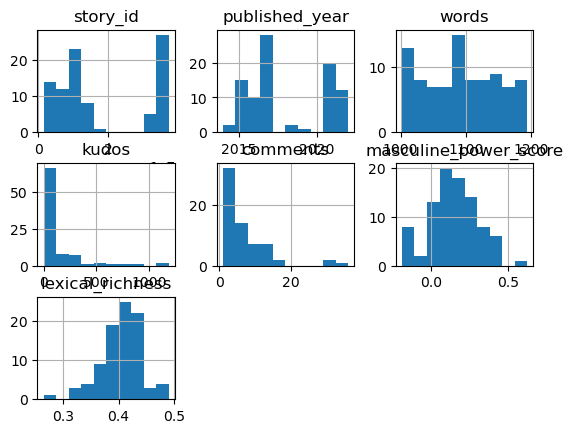

In [13]:
# Q3a (code): Check data distribution
df.hist()

In [14]:
# Q3b (code): compute some descriptive statistics
df.describe()

,story_id,published_year,words,kudos,comments,masculine_power_score,lexical_richness
count,9.000000e+01,90.000000,90.000000,89.000000,65.000000,90.000000,90.000000
mean,1.839576e+07,2018.088889,1094.344444,135.393258,6.923077,0.148132,0.405027
std,1.307922e+07,2.612177,55.327048,229.972311,7.005149,0.157504,0.037109
min,1.572659e+06,2014.000000,1002.000000,1.000000,1.000000,-0.190497,0.264443
25%,7.448760e+06,2016.000000,1042.250000,20.000000,2.000000,0.056684,0.384458
50%,1.224167e+07,2017.000000,1095.000000,54.000000,5.000000,0.139023,0.410169
75%,3.517148e+07,2021.000000,1141.750000,122.000000,9.000000,0.250019,0.428415
max,3.736347e+07,2022.000000,1194.000000,1190.000000,36.000000,0.626032,0.491349


In [17]:
# Q3c (code): Check for any missing values
print(df.isnull().sum())
# There were null values here before, and then I ran it again after clearing the null value in Q3d,
# so the current result is that there is no null value.

story_id                 0
published_year           0
words                    0
kudos                    0
comments                 0
story_content            0
masculine_power_score    0
lexical_richness         0
dtype: int64


In [16]:
# Q3d (code): replace all the NA values with zeros and check again Q3c
df.fillna(0, inplace=True) # Replace all NA values with zeros

It's always important to visualize the data to inspect the distributions of values for the variables your interested in (do you remember the dinosaur data shown in class?).

**Q4. Create a scatterplot with `masculine_power_score` and `kudos`**

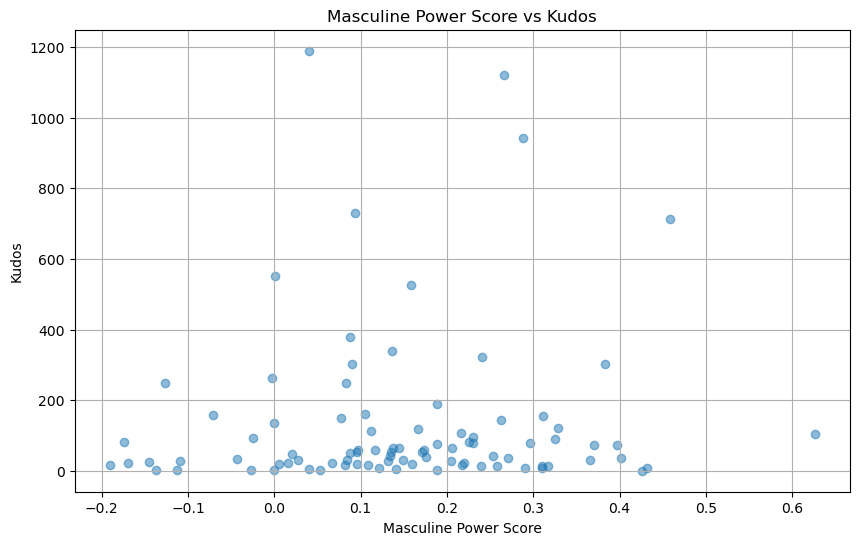

In [18]:
# Q4 (code): Create a scatterplot with masculine_power_score and kudos
plt.figure(figsize=(10, 6))
plt.scatter(df['masculine_power_score'], df['kudos'], alpha=0.5)
plt.title('Masculine Power Score vs Kudos')
plt.xlabel('Masculine Power Score')
plt.ylabel('Kudos')
plt.grid(True)
plt.show()

**Q5. Multiple Regression and Analysis**

In [19]:
# Q5 (code): Do OLS Multiple Regression and print the regression result summary
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

X = df[['masculine_power_score', 'published_year', 'lexical_richness']]
y = df['kudos']

model = LinearRegression()
model.fit(X, y)

X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

# The F-test is included in the model summary
print("F-statistic and its significance (p-value):")
print(f"F-statistic: {model_sm.fvalue}")
print(f"P-value of F-statistic: {model_sm.f_pvalue}")

# The t-tests for individual predictors are also included in the model summary
print("Coefficients and their t-tests:")
print(model_sm.summary().tables[1])

                            OLS Regression Results                            
Dep. Variable:                  kudos   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     5.535
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00160
Time:                        05:49:36   Log-Likelihood:                -608.34
No. Observations:                  90   AIC:                             1225.
Df Residuals:                      86   BIC:                             1235.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.983e+

**Q6. Interpret the results of the regression analysis**

**Q6a (words): Interpret the R-squared and Adj. R-squared**

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model. The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

**Q6b (words): Interpret F-test result**

The F-statistic is approximately 5.5346, and its associated p-value is approximately 0.0016. The p-value of the F-statistic is small (commonly <0.05), we can reject the null hypothesis that the model with no predictors fits the data as well as the model. This suggests that the model, with at least one predictor, significantly predicts the response variable. The overall model is statistically significant compared to a model without any predictors.

**Q6c (words): Interpret coefficients and t-test result**

For each predictor, a low p-value (<0.05) suggests rejecting the null hypothesis for the corresponding coefficient being zero, indicating a statistically significant relationship between the predictor and the response variable. 

Const (6.983e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero. 

Masculine_power_score (50.0797): This variable is not statistically significant (p-value 0.73) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset. 

Published_year (-34.6144): This is the variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.

Lexical_richness (386.0502): This variable is not statistically significant (p-value 0.446), indicating that words do not significantly impact the number of kudos in the given dataset. Lexical richness does not appear to significantly affect the number of kudos (p-value 0.53)

Based on the OLS regression results provided, here is an example analysis:

The model's R-squared value of 0.162 indicates that approximately 16.2% of the variability in the kudos can be explained by the model. While this suggests that the model explains a portion of the variability, there remains a significant amount unaccounted for, which might be explained by factors not included in the model.

The adjusted R-squared value of 0.133 takes into account the number of predictors in the model and the number of observations, showing a slight decrease from the R-squared value, which is normal as it adjusts for the number of terms in the model.

Looking at the coefficients:

const (6.995e+04): The constant term is significantly different from zero, which may represent the base number of kudos when all other variables are held at zero.
masculine_power_score (59.7927): This variable is not statistically significant (p-value 0.668) with a wide confidence interval, suggesting that the masculine power score does not significantly impact the number of kudos in the given dataset.
lexical_richness (390.3633): Similar to the masculine power score, lexical richness does not appear to significantly affect the number of kudos (p-value 0.524).
published_year (-34.6801): This is the only variable with a statistically significant coefficient (p-value < 0.001), indicating that more recent stories tend to have fewer kudos.
The large F-statistic (5.561) and its associated low probability (0.00155) suggest that the overall model is statistically significant compared to a model without any predictors.

**Q7: Residual Analysis**

Normality Test, Homoscedasticity Test

In [20]:
# Q7a (code): Calculate residuals and do a Shapiro-Wilk Test
from sklearn.linear_model import LinearRegression
predictor = df[['masculine_power_score', 'published_year', 'lexical_richness']]
response = df[['kudos']]

linreg = LinearRegression()
regression_model = linreg.fit(predictor, response)

predictions = regression_model.predict(predictor)
residuals = response - predictions

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk Test:', shapiro_test)

Shapiro-Wilk Test: ShapiroResult(statistic=0.6867783069610596, pvalue=1.4674083346002953e-12)


**Q7b (words): Write your analysis for the Normality Test there:**

According to the results of the Shapiro-Wilk test, the p-value is 1.4674083346002953e-12, which is less than 0.05. We can reject the null hypothesis. Therefore, we conclude that the residuals do not follow a normal distribution. This indicates that the residuals from the linear regression model may not satisfy the assumption of normality. It could potentially impact the results of the linear regression model.

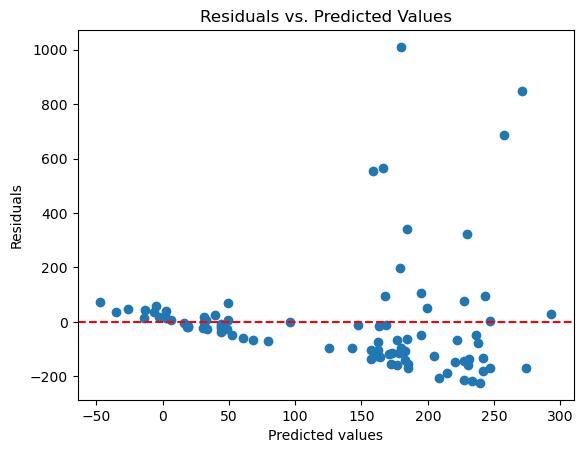

In [21]:
# Q7c (code): Homoscedasticity Test (plot residuals vs. predictions)
plt.scatter(predictions, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In the residuals vs. predicted values plot, you would look for patterns. In a well-fitted model, you would expect to see the residuals randomly scattered around zero, with no clear pattern. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity.

**Q7d (words): Write your analysis for the Homoscedasticity Test here:**

According to the figure above, we can see that there are no clear patterns, and a few points that deviate significantly from the y=0 line may indicate outliers in the data, potentially impacting the performance of the model. These outlier points can have a disproportionate influence on the model fit and may require further investigation. The presence of a pattern might suggest issues with model specification, such as non-linearity or heteroscedasticity, suggesting that the model may not provide equally reliable predictions across all levels of the independent variables.

**Q8: Multicollinearity**

In [22]:
# Q8a (code)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                 feature         VIF
0  masculine_power_score    1.907504
1         published_year  121.577500
2       lexical_richness  122.441215


Regarding multicollinearity, the VIF values for masculine_power_score, lexical_richness, and published_year are close to 1, which suggests low multicollinearity. However, the very high VIF for the const term, along with the large condition number, suggests that there may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

**Q8b (words): Write your analysis for the multicollinearity test here:**

Based on the Variance Inflation Factor (VIF) results: 

The VIF analysis reveals varying degrees of multicollinearity among the predictors. For the feature masculine_power_score, the VIF value is 1.907504, indicating a relatively low level of multicollinearity. However, for the predictors published_year and lexical_richness, the VIF values are extremely high, with values of 121.577500 and 122.441215. These high VIF values suggest a strong multicollinearity issue between these two predictors. There may be numerical issues, possibly due to a large scale difference between predictors or multicollinearity issues not captured by standard VIF calculations.

**Q9: Reflection**

**Q9 (words): Write your reflection on the whole research framework and corresponding result here, e.g., what do you think can be improved?**

Overall, the research framework provides a systematic approach to investigating factors that influence the success of fanfiction. Tests for normality, multicollinearity, and Homoscedasticity provide valuable diagnostic information about the regression model. The identification of Homoscedasticity and multicollinearity issues highlighted potential limitations of the model and areas for improvement.

So I think the following points could be improved:

Adjusting the regression model to enhance its predictive accuracy.

Refinement of the study variables is necessary, along with the exploration of additional factors that may influence the success of fanfiction stories. This could include variables related to narrative structure, character development, or reader engagement metrics.

The quantitative research could be combined with qualitative methods or user feedback to gain insights into reader preferences and engagement with fanfiction content.

##**Reference:**##

Seymour Benjamin Chatman. 1980. Story and Discourse: Narrative Structure in Fiction and Film. Cornell University Press, Ithaca, NY, USA.

Bennet, Andrew, and Nicholas Royle. Introduction to Literature Criticism and Theory. Edinburgh: Pearson Education Limited, 2004.Web.July. 2017.

Reaske, Christoper Russel. Analyze Drama. New York: Monarch Press, 1996. Print.

Jung, Sun “Bae Yong-Joon, Soft Masculinity, and Japanese Fans: Our Past Is in Your Present Body” from Korean Masculinities and Transcultural Consumption, Hong Kong Scholarship Online, 2010.

Kuo, Linda, et al., “Performance, Fantasy, or Narrative: LGBTQ+ Asian American Identity through Kpop Media in Fandom”, Journal of Homosexuality, 2020.

Kwon, Jungmin, Straight Korean Female Fans and Their Gay Fantasies, University of Iowa Press, 2019, ebook.

Oh, Chuyun, “Queering spectatorship in K-pop: The androgynous male dancing body and western female fandom”, Journal of Fandom Studies, vol. 3, no. 1, 2015, pp. 59-78.